<a href="https://colab.research.google.com/github/Gobals89/dlcourse_ai/blob/master/Tabular%20Playground%20Series%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objs as go

In [2]:
df_train = pd.read_csv('train.csv', sep=',', parse_dates=['date'], index_col=False)
df_train

,row_id,date,country,store,product,num_sold
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240
...,...,...,...,...,...,...
70123,70123,2020-12-31,Spain,KaggleMart,Kaggle for Kids: One Smart Goose,614
70124,70124,2020-12-31,Spain,KaggleRama,Kaggle Advanced Techniques,215
70125,70125,2020-12-31,Spain,KaggleRama,Kaggle Getting Started,158
70126,70126,2020-12-31,Spain,KaggleRama,Kaggle Recipe Book,135


In [3]:
df_test = pd.read_csv('test.csv', sep=',', parse_dates=['date'])
df_test

,row_id,date,country,store,product
0,70128,2021-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques
1,70129,2021-01-01,Belgium,KaggleMart,Kaggle Getting Started
2,70130,2021-01-01,Belgium,KaggleMart,Kaggle Recipe Book
3,70131,2021-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose
4,70132,2021-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques
...,...,...,...,...,...
17515,87643,2021-12-31,Spain,KaggleMart,Kaggle for Kids: One Smart Goose
17516,87644,2021-12-31,Spain,KaggleRama,Kaggle Advanced Techniques
17517,87645,2021-12-31,Spain,KaggleRama,Kaggle Getting Started
17518,87646,2021-12-31,Spain,KaggleRama,Kaggle Recipe Book


In [4]:
place_split = df_train.shape[0]
place_split

70128

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70128 entries, 0 to 70127
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   row_id    70128 non-null  int64         
 1   date      70128 non-null  datetime64[ns]
 2   country   70128 non-null  object        
 3   store     70128 non-null  object        
 4   product   70128 non-null  object        
 5   num_sold  70128 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 3.2+ MB


In [6]:
feat_float = df_train.select_dtypes(np.float).columns
feat_int = df_train.select_dtypes(np.int).columns
feat_object = df_train.select_dtypes(np.object).columns
print("Float Features:",feat_float)
print("Integer Features:",feat_int)
print("Object Features:",feat_object)

Float Features: Index([], dtype='object')
Integer Features: Index(['row_id', 'num_sold'], dtype='object')
Object Features: Index(['country', 'store', 'product'], dtype='object')


In [7]:
labels=['Integer Features', 'Object Features']
values= [len(feat_int), len(feat_object)]


fig = go.Figure()
fig.add_trace(go.Pie(values = values,labels = labels,hole = 0.5, 
                     hoverinfo ='label+percent'))
fig.update_traces(textfont_size = 12, hoverinfo ='label+percent',textinfo ='label', 
                  showlegend = False,marker = dict(colors =["#a8e6cf","#ff8b94"]),
                  title = dict(text = 'Features Distribution'))  
fig.update_layout(height = 500, width = 700, bargap = 0.1, xaxis = dict(tickmode ='linear'),
                  title_text ="<b>Features Distribution</b>",paper_bgcolor ="#F4F2F0",
                  plot_bgcolor ="#F4F2F0",
                  title_font = dict(size = 20, family ='Verdana', color ='#003566'),
                  hoverlabel = dict(font_size = 13))
fig.update_layout(shapes = [dict(type ="line", xref ='paper', yref ='paper',
                                 x0 = -0.08, y0 = 1.09, x1 = 0.405, y1 = 1.09)])
fig.show()

In [8]:
df_train.groupby(['country', 'store']).agg({'num_sold':'sum'}).sort_values('num_sold', ascending=False)

,,num_sold
country,store,
Germany,KaggleMart,2068327
Belgium,KaggleMart,2064078
France,KaggleMart,1865517
Italy,KaggleMart,1635044
Spain,KaggleMart,1487691
Poland,KaggleMart,996597
Germany,KaggleRama,718088
Belgium,KaggleRama,716972
France,KaggleRama,646802


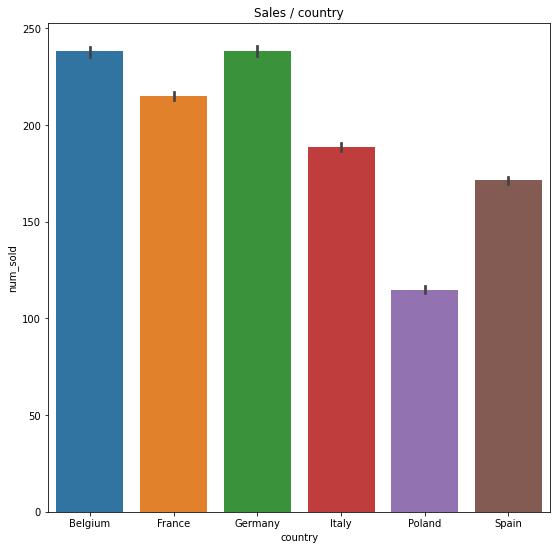

In [9]:
plt.figure(figsize=(9, 9))
sns.barplot(data=df_train, x='country', y='num_sold')
plt.title('Sales / country')
sns.set_theme(
    context='notebook',
    style='whitegrid',
    palette='pastel',
    font='sans-serif',
    font_scale=1,
    color_codes='r',
    rc=None,
)
plt.show()

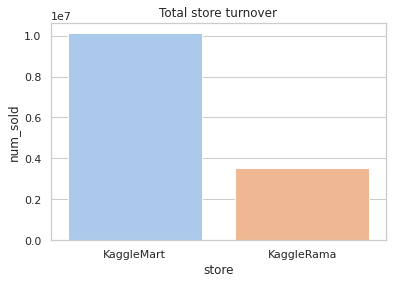

In [10]:
sns.barplot(data = df_train.groupby('store', as_index=False).agg({'num_sold':'sum'}), x='store', y='num_sold')
plt.title('Total store turnover')
plt.show()

In [11]:
def add_time_feature(df):
    import holidays
     
    #### Date
    df['week']= df['date'].dt.week
    df['year'] = df['date'].dt.year
    df['quarter'] = df['date'].dt.quarter
    df['day'] = df['date'].dt.day
    df['dayofyear'] = df['date'].dt.dayofyear
    df.loc[(df.date.dt.is_leap_year) & (df.dayofyear >= 60),'dayofyear'] -= 1
    df['weekend'] = df['date'].dt.weekday >=5
    df['weekday'] = df['date'].dt.weekday
    df['month']= df['date'].dt.month
    df['dayOfMonth'] = df['date'].dt.day
    
    #### Till The Next Holiday
    def get_country_holidays(country, years_list):
        festivities = holidays.CountryHoliday(country, years=years_list)
        festivities_df = pd.DataFrame.from_dict(festivities, orient='index').reset_index().rename(columns={'index':'date', 0:'festivity_name'})
        festivities_df['date'] = pd.to_datetime(festivities_df['date'])

        additional_dates = [[pd.to_datetime(f'{year}-12-24'), 'Christmas Eve'] for year in years_list]
        additional_dates += [[pd.to_datetime(f'{year}-12-29'), 'Peak in sales 1/2'] for year in years_list]
        additional_dates += [[pd.to_datetime(f'{year}-12-30'), 'Peak in sales 2/2'] for year in years_list]
        additional_dates += [[pd.to_datetime(f'{year}-12-31'), 'Saint Sylvester'] for year in years_list]
        additional_dates += [[pd.to_datetime(f'{year}-01-01'), 'New Year'] for year in years_list]
        additional_festivities_df = pd.DataFrame(additional_dates, columns=['date', 'festivity_name'])    

        festivities_df = festivities_df.append(additional_festivities_df, ignore_index=True)
        return festivities_df.sort_values('date')

    def days_till_next_holiday(country, date):
        country_holidays_dates = get_country_holidays(country, [date.year, date.year+1])['date']
        next_date = min([holidays_date for holidays_date in country_holidays_dates if holidays_date >= date])
        return (next_date - date).days
    
    df['days_till_next_holiday'] = df.apply(lambda x: days_till_next_holiday(x['country'], x['date']), axis=1)

In [12]:
df = pd.concat([df_train, df_test], axis=0, ignore_index=True)

In [13]:
add_time_feature(df)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87648 entries, 0 to 87647
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   row_id                  87648 non-null  int64         
 1   date                    87648 non-null  datetime64[ns]
 2   country                 87648 non-null  object        
 3   store                   87648 non-null  object        
 4   product                 87648 non-null  object        
 5   num_sold                70128 non-null  float64       
 6   week                    87648 non-null  int64         
 7   year                    87648 non-null  int64         
 8   quarter                 87648 non-null  int64         
 9   day                     87648 non-null  int64         
 10  dayofyear               87648 non-null  int64         
 11  weekend                 87648 non-null  bool          
 12  weekday                 87648 non-null  int64 

In [32]:
week_df = df.groupby('weekday', as_index=False).agg({'num_sold':'sum'})
week_df['weekday'] = ['Monday', 'Tuesday', 'Wednesday',  'Thursday','Friday','Saturday', 'Sunday']

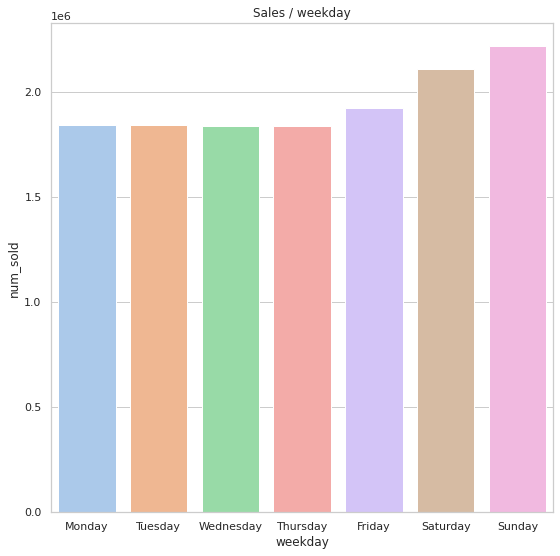

In [35]:
plt.figure(figsize=(9, 9))
sns.barplot(data=week_df, x='weekday', y= 'num_sold')
plt.title('Sales / weekday')
sns.set_theme(
    context='notebook',
    style='whitegrid',
    palette='pastel',
    font='sans-serif',
    font_scale=1,
    color_codes='r',
    rc=None,
)
plt.show()

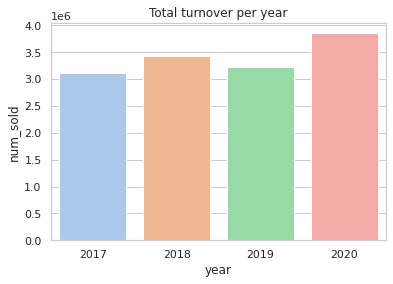

In [38]:
sns.barplot(data=df[df['year'] <2021]#withot 2021, becouse have no data
            .groupby('year',as_index=False).agg({'num_sold':'sum'}), x='year', y='num_sold');
plt.title('Total turnover per year')
plt.show()

In [39]:
df.drop(['num_sold'], axis=1, inplace=True)

In [123]:
df.drop(['row_id', 'date'], axis=1, inplace=True)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87648 entries, 0 to 87647
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 87648 non-null  object
 1   store                   87648 non-null  object
 2   product                 87648 non-null  object
 3   week                    87648 non-null  int64 
 4   year                    87648 non-null  int64 
 5   quarter                 87648 non-null  int64 
 6   day                     87648 non-null  int64 
 7   dayofyear               87648 non-null  int64 
 8   weekend                 87648 non-null  bool  
 9   weekday                 87648 non-null  int64 
 10  month                   87648 non-null  int64 
 11  dayOfMonth              87648 non-null  int64 
 12  days_till_next_holiday  87648 non-null  int64 
 13  Random                  87648 non-null  int64 
dtypes: bool(1), int64(10), object(3)
memory usage: 8.8+ MB

In [105]:
df['Random'] = np.random.randint(1, 10, df.shape[0])

In [126]:
X, test = df[:place_split], df[place_split:]

In [127]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
cols = ['country', 'store', 'product', 'weekend']
for col in cols:
    le = LabelEncoder()
    X[col] = enc.fit_transform(X[col])
    test[col] = enc.transform(test[col])

In [128]:
y = df_train['num_sold']

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state=42)

In [131]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((56102, 14), (14026, 14), (56102,), (14026,))

In [132]:
from sklearn.ensemble import RandomForestRegressor
'''n_estimators: int = 100, *, criterion: str = "squared_error", max_depth: Any | None = None, min_samples_split: int = 2,
min_samples_leaf: int = 1, min_weight_fraction_leaf: float = 0, max_features: str = "auto", max_leaf_nodes: Any | None = None,
 min_impurity_decrease: float = 0, bootstrap: bool = True, oob_score: bool = False, n_jobs: Any | None = None, random_state: Any | None = None, 
 verbose: int = 0, warm_start: bool = False, ccp_alpha: float = 0, max_samples: Any | None = None) -> None'''
from sklearn.model_selection import GridSearchCV

In [133]:
tree = RandomForestRegressor()

In [134]:
params_2 = {'n_estimators': [500], 'criterion': ["squared_error"], 'max_depth': [7], 'min_samples_split': [20], 'min_samples_leaf':[4], 'random_state': [42], 
            'ccp_alpha': [0.05],  'bootstrap': [True], 'oob_score':[True], 'verbose':[True]}

In [135]:
grid_tree = GridSearchCV(tree, param_grid=params_2, cv=3, n_jobs=-1)

In [136]:
grid_tree.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   47.8s finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'ccp_alpha': [0.05],
                         'criterion': ['squared_error'], 'max_depth': [7],
                         'min_samples_leaf': [4], 'min_samples_split': [20],
                         'n_estimators': [500], 'oob_score': [True],
                         'random_state': [42], 'verbose': [True]})

In [137]:
best_tree = grid_tree.best_estimator_
feat_importants = pd.DataFrame(data=[X_train.columns, best_tree.feature_importances_]).T.rename(columns={0:'Feature', 1:'Importance'}).sort_values(by='Importance', ascending=False)

In [138]:
feat_importants.Importance = feat_importants.Importance.astype('Float32')
feat_importants.Importance.dtype

Float32Dtype()

In [140]:
feat_importants

,Feature,Importance
1,store,0.588817
0,country,0.155476
2,product,0.148179
4,year,0.053847
7,dayofyear,0.029612
3,week,0.013676
9,weekday,0.004699
8,weekend,0.004647
10,month,0.000462
5,quarter,0.000349


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

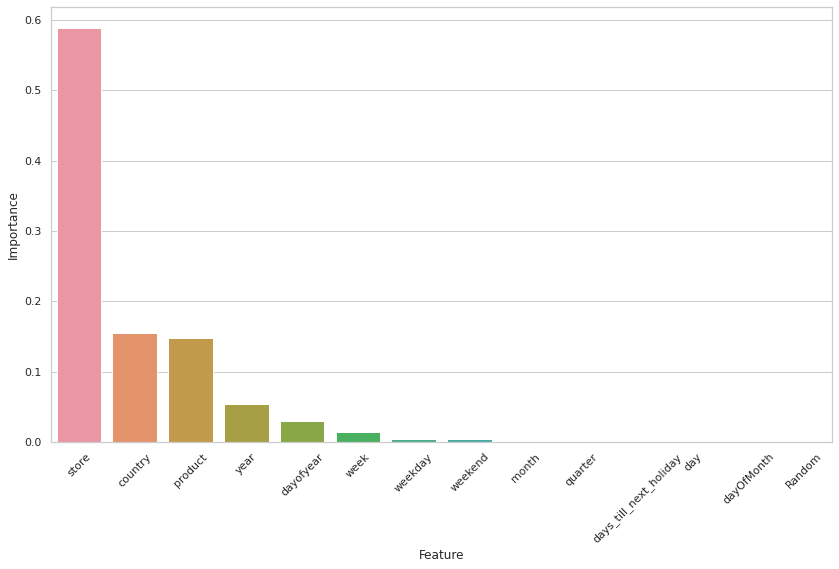

In [142]:
plt.figure(figsize=(14, 8)) 
sns.barplot(data=feat_importants, y = feat_importants['Importance'], x = feat_importants['Feature'])
plt.xticks(rotation=45)

In [143]:
print('R^2 Training Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(best_tree.score(X_train, y_train), 
                                                                                             best_tree.score(X_val, y_val)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


R^2 Training Score: 0.95 
R^2 Validation Score: 0.95


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.4s finished


In [146]:
import lightgbm as lgbm  
from lightgbm import LGBMRegressor

In [148]:
train_features = [col for col in df.columns if col not in ['days_till_next_holiday','quarter', 'day', 'daOfMonth', 'Random']]

In [151]:
model =  LGBMRegressor(objective ='regression',learning_rate = 0.03, max_depth = 5, metric ='mae',
                            n_estimators = 2000, random_state = 42)


In [152]:
model.fit(X_train, y_train)

LGBMRegressor(learning_rate=0.03, max_depth=5, metric='mae', n_estimators=2000,
              objective='regression', random_state=42)

In [153]:
Score_train = model.score(X_train, y_train)
Val_score = model.score(X_val, y_val)
print(f'Score on training set - {Score_train}.\nScore on validation set - {Val_score}')

Score on training set - 0.9902180963713313.
Score on validation set - 0.9879861830374671


In [177]:
y_pred = model.predict(test)

In [178]:
submission = pd.DataFrame(data=y_pred, index=df_test.index)

In [181]:
submission['row_id'] = df_test['row_id']

In [183]:
submission.rename(columns={0:'num_sold'}, inplace=True)

In [169]:
submission=submission.round({"num_sold":0})

In [185]:
submission = submission.reindex(columns=['row_id', 'num_sold'])

In [187]:
submission.to_csv('submission.csv', index=False, sep=',')

In [188]:
submission

,row_id,num_sold
0,70128,394.266138
1,70129,330.857090
2,70130,274.349117
3,70131,468.275729
4,70132,144.610072
...,...,...
17515,87643,615.012005
17516,87644,204.821375
17517,87645,172.751732
17518,87646,140.831215


In [66]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [67]:
from catboost import CatBoostRegressor, Pool, cv

In [68]:
df_cat = df.drop(['row_id', 'date'], axis=1)

In [69]:
X_cat, test_cat = df_cat[:place_split], df_cat[place_split:]

In [70]:
X_train, X_val, y_train, y_val = train_test_split(X_cat, y, test_size = 0.2, random_state=42)

In [71]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((56102, 13), (14026, 13), (56102,), (14026,))

In [75]:
categorial_feat = ['country', 'store', 'product', 'weekend']

In [82]:
grid = {'learning_rate': [0.05], 'iterations': [2000],
        'depth': [8],
        'l2_leaf_reg': [1]}

In [83]:
cat = CatBoostRegressor(random_seed=42, cat_features=categorial_feat)

In [ ]:
grid_search_result = cat.grid_search(grid, X=X_train, y=y_train)

In [85]:
cat.score(X_val, y_val)

0.9894949629764408

In [86]:
#Get best from grid search
params_cat = {'nan_mode': 'Min',
 'eval_metric': 'RMSE',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'iterations': 1750,
 'sampling_frequency': 'PerTree',
 'fold_permutation_block': 0,
 'leaf_estimation_method': 'Newton',
 'counter_calc_method': 'SkipTest',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'ctr_leaf_count_limit': 18446744073709551615,
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 1,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': True,
 'max_ctr_complexity': 4,
 'model_size_reg': 0.5,
 'simple_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'pool_metainfo_options': {'tags': {}},
 'subsample': 0.800000011920929,
 'use_best_model': False,
 'random_seed': 42,
 'depth': 8,
 'ctr_target_border_count': 1,
 'posterior_sampling': False,
 'has_time': False,
 'store_all_simple_ctr': False,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'RMSE',
 'learning_rate': 0.05000000074505806,
 'score_function': 'Cosine',
 'task_type': 'CPU',
 'leaf_estimation_iterations': 1,
 'bootstrap_type': 'MVS',
 'max_leaves': 256,
 'permutation_count': 4}

In [97]:
cat.feature_importances_

array([11.21688169, 56.9518422 , 14.53998799,  1.33120635,  7.79513662,
        0.64199273,  0.29939331,  3.42640161,  1.0651015 ,  1.10280879,
        1.14343426,  0.09617019,  0.38964276])

In [88]:
y_cat_pred = cat.predict(test_cat)

In [89]:
y_cat_pred

array([407.42054129, 351.12799814, 296.18185046, ..., 164.10135971,
       141.25812604, 216.45645272])

In [90]:
submission = pd.DataFrame(data=y_cat_pred, index=test.index)

In [ ]:
submission

In [92]:
submission['row_id'] = test['row_id']

In [93]:
submission.rename(columns={0:'num_sold'}, inplace=True)

In [94]:
submission=submission.round({"num_sold":0})

In [95]:
submission = submission.reindex(columns=['row_id', 'num_sold'])

In [96]:
submission.to_csv('submission.csv', index=False, sep=',')